In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import numpy as np
import os
from custom_rnn import SequenceModel, Trainer
import torch
from utils.visualize import *

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
device = torch.device("cpu")

In [14]:
root = os.getcwd()
S_train, A_train, S_final_train, S_next_train = np.load(root+"/../datasets/custom_rnn/train/input_states.npy"), np.load(root+"/../datasets/custom_rnn/train/input_actions.npy"), np.load(root+"/../datasets/custom_rnn/train/intermediate_states.npy"), np.load(root+"/../datasets/custom_rnn/train/output_states.npy")
S_val, A_val, S_final_val, S_next_val = np.load(root+"/../datasets/custom_rnn/val/input_states.npy"), np.load(root+"/../datasets/custom_rnn/val/input_actions.npy"), np.load(root+"/../datasets/custom_rnn/val/intermediate_states.npy"), np.load(root+"/../datasets/custom_rnn/val/output_states.npy")
S_test, A_test, S_final_test, S_next_test = np.load(root+"/../datasets/custom_rnn/test/input_states.npy"), np.load(root+"/../datasets/custom_rnn/test/input_actions.npy"), np.load(root+"/../datasets/custom_rnn/test/intermediate_states.npy"), np.load(root+"/../datasets/custom_rnn/test/output_states.npy")

In [15]:
S_train.shape, A_train.shape, S_final_train.shape, S_next_train.shape

((159043, 100, 21), (159043, 100, 8), (159043, 21), (159043, 100, 21))

In [16]:
S_val.shape, A_val.shape, S_final_val.shape, S_next_val.shape

((8835, 100, 21), (8835, 100, 8), (8835, 21), (8835, 100, 21))

In [17]:
S_test.shape, A_test.shape, S_final_test.shape, S_next_test.shape

((8835, 100, 21), (8837, 100, 8), (8837, 21), (8837, 100, 21))

In [18]:
seq_model = SequenceModel(state_dim=21, action_dim=8, latent_dim=256, num_recurrent_layers=1, device=device).to(device)

In [19]:
trainer = Trainer(model=seq_model, device=device, learing_rate=1e-5)

In [11]:
trainer.load_checkpoint(path=root+"/../models/vanilla_rnn.pth")

In [24]:
losses = trainer.train(train=(S_train[:1000], A_train[:1000], S_final_train[:1000], S_next_train[:1000]), val=(S_val[:100], A_val[:100], S_final_val[:100], S_next_val[:100]), epochs=1000, batch_size=256, shuffle=True, verbose=True)

EPOCH 0: Training 0/768 ... LOSS: 56035.53516
EPOCH 0: Training 256/768 ... LOSS: 54971.03125
EPOCH 0: Training 512/768 ... LOSS: 56868.34375
EPOCH 1: Training 0/768 ... LOSS: 54694.40625
EPOCH 1: Training 256/768 ... LOSS: 57161.80859
EPOCH 1: Training 512/768 ... LOSS: 54690.87500
EPOCH 2: Training 0/768 ... LOSS: 56867.23438
EPOCH 2: Training 256/768 ... LOSS: 55613.59766
EPOCH 2: Training 512/768 ... LOSS: 57099.69922
EPOCH 3: Training 0/768 ... LOSS: 55201.50781
EPOCH 3: Training 256/768 ... LOSS: 58042.84375
EPOCH 3: Training 512/768 ... LOSS: 55541.19922
EPOCH 4: Training 0/768 ... LOSS: 57201.30078
EPOCH 4: Training 256/768 ... LOSS: 54408.89453
EPOCH 4: Training 512/768 ... LOSS: 54773.89062
EPOCH 5: Training 0/768 ... LOSS: 55575.35938
EPOCH 5: Training 256/768 ... LOSS: 56858.34375
EPOCH 5: Training 512/768 ... LOSS: 56565.25391
EPOCH 6: Training 0/768 ... LOSS: 57314.58203
EPOCH 6: Training 256/768 ... LOSS: 55336.58984
EPOCH 6: Training 512/768 ... LOSS: 54019.46875
EPOCH 

EPOCH 56: Training 512/768 ... LOSS: 58915.21094
EPOCH 57: Training 0/768 ... LOSS: 54561.67188
EPOCH 57: Training 256/768 ... LOSS: 57279.85547
EPOCH 57: Training 512/768 ... LOSS: 52803.06250
EPOCH 58: Training 0/768 ... LOSS: 53880.12500
EPOCH 58: Training 256/768 ... LOSS: 55113.53125
EPOCH 58: Training 512/768 ... LOSS: 54264.79688
EPOCH 59: Training 0/768 ... LOSS: 54809.30469
EPOCH 59: Training 256/768 ... LOSS: 53145.46484
EPOCH 59: Training 512/768 ... LOSS: 55794.79688
EPOCH 60: Training 0/768 ... LOSS: 54904.07422
EPOCH 60: Training 256/768 ... LOSS: 53229.50391
EPOCH 60: Training 512/768 ... LOSS: 58395.23828
EPOCH 61: Training 0/768 ... LOSS: 55548.40625
EPOCH 61: Training 256/768 ... LOSS: 52721.81250
EPOCH 61: Training 512/768 ... LOSS: 55532.87500
EPOCH 62: Training 0/768 ... LOSS: 55851.07031
EPOCH 62: Training 256/768 ... LOSS: 53444.56250
EPOCH 62: Training 512/768 ... LOSS: 55842.04688
EPOCH 63: Training 0/768 ... LOSS: 56956.73828
EPOCH 63: Training 256/768 ... LOS

EPOCH 113: Training 0/768 ... LOSS: 55720.26172
EPOCH 113: Training 256/768 ... LOSS: 51068.44531
EPOCH 113: Training 512/768 ... LOSS: 54653.01172
EPOCH 114: Training 0/768 ... LOSS: 51370.87500
EPOCH 114: Training 256/768 ... LOSS: 51317.26953
EPOCH 114: Training 512/768 ... LOSS: 56018.35938
EPOCH 115: Training 0/768 ... LOSS: 54158.60156
EPOCH 115: Training 256/768 ... LOSS: 53139.72266
EPOCH 115: Training 512/768 ... LOSS: 53960.63672
EPOCH 116: Training 0/768 ... LOSS: 55830.53516
EPOCH 116: Training 256/768 ... LOSS: 52606.22656
EPOCH 116: Training 512/768 ... LOSS: 51902.44922
EPOCH 117: Training 0/768 ... LOSS: 52281.90625
EPOCH 117: Training 256/768 ... LOSS: 51583.91797
EPOCH 117: Training 512/768 ... LOSS: 53867.18359
EPOCH 118: Training 0/768 ... LOSS: 53247.16016
EPOCH 118: Training 256/768 ... LOSS: 52279.57031
EPOCH 118: Training 512/768 ... LOSS: 56256.83984
EPOCH 119: Training 0/768 ... LOSS: 52323.74219
EPOCH 119: Training 256/768 ... LOSS: 53936.74219
EPOCH 119: Tra

EPOCH 168: Training 512/768 ... LOSS: 46592.22266
EPOCH 169: Training 0/768 ... LOSS: 53277.22656
EPOCH 169: Training 256/768 ... LOSS: 50179.72656
EPOCH 169: Training 512/768 ... LOSS: 53952.36328
EPOCH 170: Training 0/768 ... LOSS: 53210.62500
EPOCH 170: Training 256/768 ... LOSS: 53244.75000
EPOCH 170: Training 512/768 ... LOSS: 54674.07422
EPOCH 171: Training 0/768 ... LOSS: 55379.78516
EPOCH 171: Training 256/768 ... LOSS: 52511.29688
EPOCH 171: Training 512/768 ... LOSS: 51956.33594
EPOCH 172: Training 0/768 ... LOSS: 50350.12109
EPOCH 172: Training 256/768 ... LOSS: 53888.87109
EPOCH 172: Training 512/768 ... LOSS: 53789.48047
EPOCH 173: Training 0/768 ... LOSS: 53804.25000
EPOCH 173: Training 256/768 ... LOSS: 53578.25000
EPOCH 173: Training 512/768 ... LOSS: 51717.09766
EPOCH 174: Training 0/768 ... LOSS: 53421.44922
EPOCH 174: Training 256/768 ... LOSS: 52874.29297
EPOCH 174: Training 512/768 ... LOSS: 51412.40625
EPOCH 175: Training 0/768 ... LOSS: 52833.69141
EPOCH 175: Tra

EPOCH 224: Training 0/768 ... LOSS: 53582.89844
EPOCH 224: Training 256/768 ... LOSS: 50000.45312
EPOCH 224: Training 512/768 ... LOSS: 50641.01953
EPOCH 225: Training 0/768 ... LOSS: 51733.11328
EPOCH 225: Training 256/768 ... LOSS: 49529.44141
EPOCH 225: Training 512/768 ... LOSS: 52408.51953
EPOCH 226: Training 0/768 ... LOSS: 55263.72656
EPOCH 226: Training 256/768 ... LOSS: 52918.58594
EPOCH 226: Training 512/768 ... LOSS: 49354.34375
EPOCH 227: Training 0/768 ... LOSS: 54461.16406
EPOCH 227: Training 256/768 ... LOSS: 50361.79688
EPOCH 227: Training 512/768 ... LOSS: 51096.71875
EPOCH 228: Training 0/768 ... LOSS: 54134.89062
EPOCH 228: Training 256/768 ... LOSS: 49351.99219
EPOCH 228: Training 512/768 ... LOSS: 49063.25781
EPOCH 229: Training 0/768 ... LOSS: 49598.74609
EPOCH 229: Training 256/768 ... LOSS: 52675.74219
EPOCH 229: Training 512/768 ... LOSS: 52568.26562
EPOCH 230: Training 0/768 ... LOSS: 50641.37891
EPOCH 230: Training 256/768 ... LOSS: 55526.76562
EPOCH 230: Tra

EPOCH 279: Training 256/768 ... LOSS: 50761.50000
EPOCH 279: Training 512/768 ... LOSS: 45997.81250
EPOCH 280: Training 0/768 ... LOSS: 51514.91406
EPOCH 280: Training 256/768 ... LOSS: 50744.74219
EPOCH 280: Training 512/768 ... LOSS: 50958.65234
EPOCH 281: Training 0/768 ... LOSS: 47578.14844
EPOCH 281: Training 256/768 ... LOSS: 51881.96094
EPOCH 281: Training 512/768 ... LOSS: 54213.36328
EPOCH 282: Training 0/768 ... LOSS: 50023.94141
EPOCH 282: Training 256/768 ... LOSS: 49105.64844
EPOCH 282: Training 512/768 ... LOSS: 50295.92188
EPOCH 283: Training 0/768 ... LOSS: 52007.62109
EPOCH 283: Training 256/768 ... LOSS: 49350.83594
EPOCH 283: Training 512/768 ... LOSS: 48916.40625
EPOCH 284: Training 0/768 ... LOSS: 51739.74609
EPOCH 284: Training 256/768 ... LOSS: 49501.87109
EPOCH 284: Training 512/768 ... LOSS: 48703.87891
EPOCH 285: Training 0/768 ... LOSS: 49136.37109
EPOCH 285: Training 256/768 ... LOSS: 52136.10156
EPOCH 285: Training 512/768 ... LOSS: 49519.56250
EPOCH 286: T

EPOCH 334: Training 512/768 ... LOSS: 49880.81641
EPOCH 335: Training 0/768 ... LOSS: 49191.62891
EPOCH 335: Training 256/768 ... LOSS: 46576.59375
EPOCH 335: Training 512/768 ... LOSS: 49943.78125
EPOCH 336: Training 0/768 ... LOSS: 48266.19141
EPOCH 336: Training 256/768 ... LOSS: 48848.35156
EPOCH 336: Training 512/768 ... LOSS: 48765.96875
EPOCH 337: Training 0/768 ... LOSS: 49604.64062
EPOCH 337: Training 256/768 ... LOSS: 46998.06250
EPOCH 337: Training 512/768 ... LOSS: 50969.21484
EPOCH 338: Training 0/768 ... LOSS: 48590.95312
EPOCH 338: Training 256/768 ... LOSS: 48472.49219
EPOCH 338: Training 512/768 ... LOSS: 51517.96484
EPOCH 339: Training 0/768 ... LOSS: 50512.60156
EPOCH 339: Training 256/768 ... LOSS: 48555.01172
EPOCH 339: Training 512/768 ... LOSS: 49451.67578
EPOCH 340: Training 0/768 ... LOSS: 49603.87109
EPOCH 340: Training 256/768 ... LOSS: 49421.83594
EPOCH 340: Training 512/768 ... LOSS: 49340.15234
EPOCH 341: Training 0/768 ... LOSS: 45681.07031
EPOCH 341: Tra

EPOCH 390: Training 512/768 ... LOSS: 52777.21094
EPOCH 391: Training 0/768 ... LOSS: 49165.61719
EPOCH 391: Training 256/768 ... LOSS: 47628.60156
EPOCH 391: Training 512/768 ... LOSS: 49613.83984
EPOCH 392: Training 0/768 ... LOSS: 49452.87891
EPOCH 392: Training 256/768 ... LOSS: 48181.66016
EPOCH 392: Training 512/768 ... LOSS: 49478.26953
EPOCH 393: Training 0/768 ... LOSS: 48764.87500
EPOCH 393: Training 256/768 ... LOSS: 50377.93750
EPOCH 393: Training 512/768 ... LOSS: 48399.47266
EPOCH 394: Training 0/768 ... LOSS: 47652.05078
EPOCH 394: Training 256/768 ... LOSS: 49026.24609
EPOCH 394: Training 512/768 ... LOSS: 50633.27344
EPOCH 395: Training 0/768 ... LOSS: 48487.66406
EPOCH 395: Training 256/768 ... LOSS: 48603.62109
EPOCH 395: Training 512/768 ... LOSS: 51569.03516
EPOCH 396: Training 0/768 ... LOSS: 49409.37500
EPOCH 396: Training 256/768 ... LOSS: 52165.61719
EPOCH 396: Training 512/768 ... LOSS: 48157.52344
EPOCH 397: Training 0/768 ... LOSS: 48721.11328
EPOCH 397: Tra

EPOCH 446: Training 512/768 ... LOSS: 50494.01562
EPOCH 447: Training 0/768 ... LOSS: 49271.85938
EPOCH 447: Training 256/768 ... LOSS: 49723.75000
EPOCH 447: Training 512/768 ... LOSS: 48206.11719
EPOCH 448: Training 0/768 ... LOSS: 48504.18359
EPOCH 448: Training 256/768 ... LOSS: 48807.66016
EPOCH 448: Training 512/768 ... LOSS: 49272.32422
EPOCH 449: Training 0/768 ... LOSS: 48436.17188
EPOCH 449: Training 256/768 ... LOSS: 52029.11719
EPOCH 449: Training 512/768 ... LOSS: 48946.35547
EPOCH 450: Training 0/768 ... LOSS: 47770.58594
EPOCH 450: Training 256/768 ... LOSS: 50538.31641
EPOCH 450: Training 512/768 ... LOSS: 50084.21875
EPOCH 451: Training 0/768 ... LOSS: 51092.65625
EPOCH 451: Training 256/768 ... LOSS: 51723.52344
EPOCH 451: Training 512/768 ... LOSS: 47013.89062
EPOCH 452: Training 0/768 ... LOSS: 49061.36719
EPOCH 452: Training 256/768 ... LOSS: 49822.06250
EPOCH 452: Training 512/768 ... LOSS: 46931.16406
EPOCH 453: Training 0/768 ... LOSS: 51783.53125
EPOCH 453: Tra

EPOCH 502: Training 512/768 ... LOSS: 49092.49609
EPOCH 503: Training 0/768 ... LOSS: 46393.19141
EPOCH 503: Training 256/768 ... LOSS: 50236.45703
EPOCH 503: Training 512/768 ... LOSS: 47631.41016
EPOCH 504: Training 0/768 ... LOSS: 49348.39844
EPOCH 504: Training 256/768 ... LOSS: 47973.86719
EPOCH 504: Training 512/768 ... LOSS: 49398.15234
EPOCH 505: Training 0/768 ... LOSS: 50665.78906
EPOCH 505: Training 256/768 ... LOSS: 46680.77344
EPOCH 505: Training 512/768 ... LOSS: 52170.50781
EPOCH 506: Training 0/768 ... LOSS: 45839.33203
EPOCH 506: Training 256/768 ... LOSS: 49227.97656
EPOCH 506: Training 512/768 ... LOSS: 51646.53516
EPOCH 507: Training 0/768 ... LOSS: 50506.19531
EPOCH 507: Training 256/768 ... LOSS: 46189.14453
EPOCH 507: Training 512/768 ... LOSS: 49127.37500
EPOCH 508: Training 0/768 ... LOSS: 49288.44531
EPOCH 508: Training 256/768 ... LOSS: 48568.16406
EPOCH 508: Training 512/768 ... LOSS: 46812.26172
EPOCH 509: Training 0/768 ... LOSS: 47000.86719
EPOCH 509: Tra

EPOCH 558: Training 512/768 ... LOSS: 47575.75000
EPOCH 559: Training 0/768 ... LOSS: 49709.25391
EPOCH 559: Training 256/768 ... LOSS: 46687.71875
EPOCH 559: Training 512/768 ... LOSS: 49045.21094
EPOCH 560: Training 0/768 ... LOSS: 49394.75391
EPOCH 560: Training 256/768 ... LOSS: 52421.64844
EPOCH 560: Training 512/768 ... LOSS: 46490.65625
EPOCH 561: Training 0/768 ... LOSS: 49455.71484
EPOCH 561: Training 256/768 ... LOSS: 47652.25781
EPOCH 561: Training 512/768 ... LOSS: 47264.88672
EPOCH 562: Training 0/768 ... LOSS: 47928.33203
EPOCH 562: Training 256/768 ... LOSS: 50971.42969
EPOCH 562: Training 512/768 ... LOSS: 46761.52734
EPOCH 563: Training 0/768 ... LOSS: 48481.98438
EPOCH 563: Training 256/768 ... LOSS: 46246.37891
EPOCH 563: Training 512/768 ... LOSS: 49101.09766
EPOCH 564: Training 0/768 ... LOSS: 46747.68750
EPOCH 564: Training 256/768 ... LOSS: 48883.41797
EPOCH 564: Training 512/768 ... LOSS: 48858.96875
EPOCH 565: Training 0/768 ... LOSS: 48327.24609
EPOCH 565: Tra

EPOCH 614: Training 0/768 ... LOSS: 49040.13281
EPOCH 614: Training 256/768 ... LOSS: 48130.47656
EPOCH 614: Training 512/768 ... LOSS: 47206.54297
EPOCH 615: Training 0/768 ... LOSS: 48952.27734
EPOCH 615: Training 256/768 ... LOSS: 47928.92969
EPOCH 615: Training 512/768 ... LOSS: 48829.52734
EPOCH 616: Training 0/768 ... LOSS: 48729.94141
EPOCH 616: Training 256/768 ... LOSS: 47374.30078
EPOCH 616: Training 512/768 ... LOSS: 52074.04297
EPOCH 617: Training 0/768 ... LOSS: 50013.26562
EPOCH 617: Training 256/768 ... LOSS: 47936.92578
EPOCH 617: Training 512/768 ... LOSS: 46852.41016
EPOCH 618: Training 0/768 ... LOSS: 50608.75781
EPOCH 618: Training 256/768 ... LOSS: 48986.70703
EPOCH 618: Training 512/768 ... LOSS: 48576.14453
EPOCH 619: Training 0/768 ... LOSS: 49019.84375
EPOCH 619: Training 256/768 ... LOSS: 47389.00391
EPOCH 619: Training 512/768 ... LOSS: 46646.60156
EPOCH 620: Training 0/768 ... LOSS: 46640.92188
EPOCH 620: Training 256/768 ... LOSS: 46935.91016
EPOCH 620: Tra

EPOCH 669: Training 512/768 ... LOSS: 49524.94141
EPOCH 670: Training 0/768 ... LOSS: 48609.96875
EPOCH 670: Training 256/768 ... LOSS: 46170.74609
EPOCH 670: Training 512/768 ... LOSS: 50603.66016
EPOCH 671: Training 0/768 ... LOSS: 46754.60156
EPOCH 671: Training 256/768 ... LOSS: 47883.08203
EPOCH 671: Training 512/768 ... LOSS: 53525.20312
EPOCH 672: Training 0/768 ... LOSS: 47075.27734
EPOCH 672: Training 256/768 ... LOSS: 48014.51562
EPOCH 672: Training 512/768 ... LOSS: 49538.83203
EPOCH 673: Training 0/768 ... LOSS: 49905.80469
EPOCH 673: Training 256/768 ... LOSS: 47741.25781
EPOCH 673: Training 512/768 ... LOSS: 48033.48047
EPOCH 674: Training 0/768 ... LOSS: 51430.28906
EPOCH 674: Training 256/768 ... LOSS: 45648.03516
EPOCH 674: Training 512/768 ... LOSS: 50169.47656
EPOCH 675: Training 0/768 ... LOSS: 50899.77734
EPOCH 675: Training 256/768 ... LOSS: 50426.32812
EPOCH 675: Training 512/768 ... LOSS: 46834.74219
EPOCH 676: Training 0/768 ... LOSS: 46064.85547
EPOCH 676: Tra

EPOCH 725: Training 0/768 ... LOSS: 50220.98047
EPOCH 725: Training 256/768 ... LOSS: 51021.68750
EPOCH 725: Training 512/768 ... LOSS: 45388.53906
EPOCH 726: Training 0/768 ... LOSS: 46675.96094
EPOCH 726: Training 256/768 ... LOSS: 48111.50000
EPOCH 726: Training 512/768 ... LOSS: 50375.51562
EPOCH 727: Training 0/768 ... LOSS: 47580.87109
EPOCH 727: Training 256/768 ... LOSS: 50222.60547
EPOCH 727: Training 512/768 ... LOSS: 47932.46875
EPOCH 728: Training 0/768 ... LOSS: 48593.69531
EPOCH 728: Training 256/768 ... LOSS: 51415.11719
EPOCH 728: Training 512/768 ... LOSS: 46969.01953
EPOCH 729: Training 0/768 ... LOSS: 51103.13281
EPOCH 729: Training 256/768 ... LOSS: 49741.36719
EPOCH 729: Training 512/768 ... LOSS: 44873.30469
EPOCH 730: Training 0/768 ... LOSS: 50130.03125
EPOCH 730: Training 256/768 ... LOSS: 47630.77344
EPOCH 730: Training 512/768 ... LOSS: 49507.44141
EPOCH 731: Training 0/768 ... LOSS: 47070.33984
EPOCH 731: Training 256/768 ... LOSS: 46756.56250
EPOCH 731: Tra

EPOCH 780: Training 512/768 ... LOSS: 45529.28906
EPOCH 781: Training 0/768 ... LOSS: 48022.77344
EPOCH 781: Training 256/768 ... LOSS: 48942.13281
EPOCH 781: Training 512/768 ... LOSS: 46613.77734
EPOCH 782: Training 0/768 ... LOSS: 47488.07812
EPOCH 782: Training 256/768 ... LOSS: 52636.68750
EPOCH 782: Training 512/768 ... LOSS: 45617.82031
EPOCH 783: Training 0/768 ... LOSS: 46926.48438
EPOCH 783: Training 256/768 ... LOSS: 48749.12891
EPOCH 783: Training 512/768 ... LOSS: 51814.91016
EPOCH 784: Training 0/768 ... LOSS: 47853.06250
EPOCH 784: Training 256/768 ... LOSS: 49873.25000
EPOCH 784: Training 512/768 ... LOSS: 47796.92969
EPOCH 785: Training 0/768 ... LOSS: 50681.58984
EPOCH 785: Training 256/768 ... LOSS: 47184.13281
EPOCH 785: Training 512/768 ... LOSS: 47799.28906
EPOCH 786: Training 0/768 ... LOSS: 50222.42969
EPOCH 786: Training 256/768 ... LOSS: 46979.67188
EPOCH 786: Training 512/768 ... LOSS: 47820.24609
EPOCH 787: Training 0/768 ... LOSS: 47619.98047
EPOCH 787: Tra

EPOCH 836: Training 256/768 ... LOSS: 47217.50000
EPOCH 836: Training 512/768 ... LOSS: 50126.83594
EPOCH 837: Training 0/768 ... LOSS: 46916.14062
EPOCH 837: Training 256/768 ... LOSS: 50658.22266
EPOCH 837: Training 512/768 ... LOSS: 47995.52344
EPOCH 838: Training 0/768 ... LOSS: 48338.61719
EPOCH 838: Training 256/768 ... LOSS: 51465.31250
EPOCH 838: Training 512/768 ... LOSS: 48627.20312
EPOCH 839: Training 0/768 ... LOSS: 45712.31250
EPOCH 839: Training 256/768 ... LOSS: 49379.84766
EPOCH 839: Training 512/768 ... LOSS: 50114.61328
EPOCH 840: Training 0/768 ... LOSS: 47512.29688
EPOCH 840: Training 256/768 ... LOSS: 50372.91016
EPOCH 840: Training 512/768 ... LOSS: 46518.25781
EPOCH 841: Training 0/768 ... LOSS: 47905.84375
EPOCH 841: Training 256/768 ... LOSS: 50445.38281
EPOCH 841: Training 512/768 ... LOSS: 47641.85547
EPOCH 842: Training 0/768 ... LOSS: 51553.41016
EPOCH 842: Training 256/768 ... LOSS: 48011.45312
EPOCH 842: Training 512/768 ... LOSS: 49434.37109
EPOCH 843: T

EPOCH 892: Training 0/768 ... LOSS: 47059.95703
EPOCH 892: Training 256/768 ... LOSS: 49773.44922
EPOCH 892: Training 512/768 ... LOSS: 49289.44531
EPOCH 893: Training 0/768 ... LOSS: 49952.87109
EPOCH 893: Training 256/768 ... LOSS: 50782.53516
EPOCH 893: Training 512/768 ... LOSS: 46535.37109
EPOCH 894: Training 0/768 ... LOSS: 49776.49219
EPOCH 894: Training 256/768 ... LOSS: 50277.54688
EPOCH 894: Training 512/768 ... LOSS: 49082.49219
EPOCH 895: Training 0/768 ... LOSS: 49803.16797
EPOCH 895: Training 256/768 ... LOSS: 49525.30469
EPOCH 895: Training 512/768 ... LOSS: 49018.01562
EPOCH 896: Training 0/768 ... LOSS: 47904.00781
EPOCH 896: Training 256/768 ... LOSS: 51382.65234
EPOCH 896: Training 512/768 ... LOSS: 48895.71875
EPOCH 897: Training 0/768 ... LOSS: 47798.79297
EPOCH 897: Training 256/768 ... LOSS: 52236.83594
EPOCH 897: Training 512/768 ... LOSS: 49396.95312
EPOCH 898: Training 0/768 ... LOSS: 48195.95703
EPOCH 898: Training 256/768 ... LOSS: 50197.76953
EPOCH 898: Tra

EPOCH 947: Training 256/768 ... LOSS: 50953.02734
EPOCH 947: Training 512/768 ... LOSS: 46079.57422
EPOCH 948: Training 0/768 ... LOSS: 48878.89062
EPOCH 948: Training 256/768 ... LOSS: 48765.36719
EPOCH 948: Training 512/768 ... LOSS: 49563.03125
EPOCH 949: Training 0/768 ... LOSS: 49087.88672
EPOCH 949: Training 256/768 ... LOSS: 48340.58984
EPOCH 949: Training 512/768 ... LOSS: 48619.64062
EPOCH 950: Training 0/768 ... LOSS: 46311.96875
EPOCH 950: Training 256/768 ... LOSS: 50942.73047
EPOCH 950: Training 512/768 ... LOSS: 47554.09375
EPOCH 951: Training 0/768 ... LOSS: 46978.92188
EPOCH 951: Training 256/768 ... LOSS: 52304.25781
EPOCH 951: Training 512/768 ... LOSS: 47986.67969
EPOCH 952: Training 0/768 ... LOSS: 50248.01172
EPOCH 952: Training 256/768 ... LOSS: 47477.08203
EPOCH 952: Training 512/768 ... LOSS: 47202.06641
EPOCH 953: Training 0/768 ... LOSS: 48726.14453
EPOCH 953: Training 256/768 ... LOSS: 48263.25391
EPOCH 953: Training 512/768 ... LOSS: 49244.65234
EPOCH 954: T

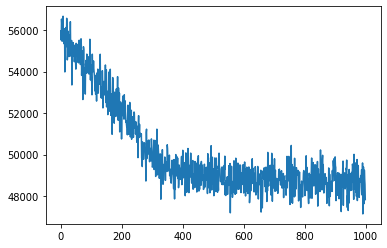

In [25]:
plt.plot(losses)
plt.show()

In [12]:
n=10

In [13]:
Y_hat = seq_model.predict(x=X_test[n:n+1], a=A_test[n:n+1])
Y = Y_test[n:n+1]

In [14]:
Y_hat.shape, Y.shape

((1, 100, 21), (1, 100, 21))

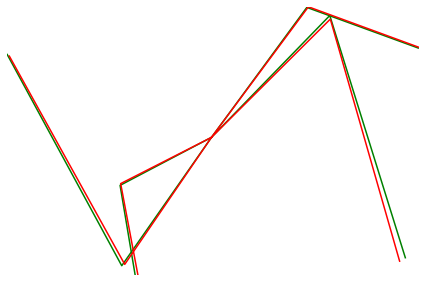

<Figure size 432x288 with 0 Axes>

In [18]:
compare_states(Y[0], Y_hat[0], overlap=True)

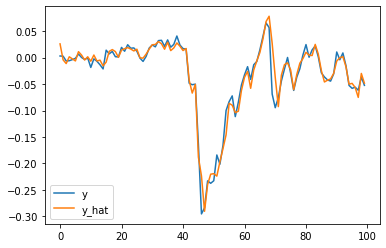

In [16]:
plot_velocity_curve(true=Y[0, :, 0], pred=Y_hat[0, :, 0])

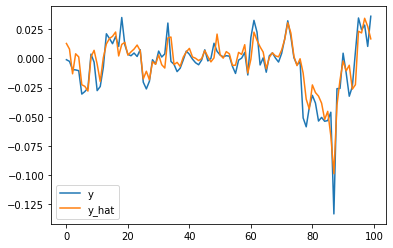

In [178]:
plot_velocity_curve(true=Y[0, :, 1], pred=Y_hat[0, :, 1])

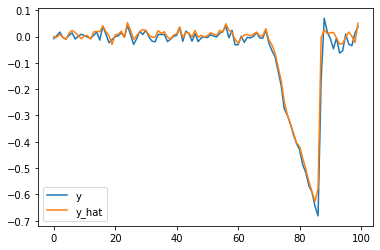

In [179]:
plot_velocity_curve(true=Y[0, :, 2], pred=Y_hat[0, :, 2])

In [164]:
trainer.save_checkpoint(path=root+"/../models/vanilla_rnn.pth")

In [29]:
Y_hat = seq_model.foresee(x=X_test[n:n+1], a=A_test[n:n+1], lookahead=1)
Y = Y_test[n:n+1]

In [30]:
Y_hat.shape

(1, 100, 21)

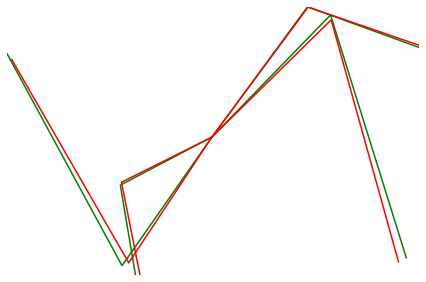

<Figure size 432x288 with 0 Axes>

In [31]:
compare_states(Y[0], Y_hat[0], overlap=True)

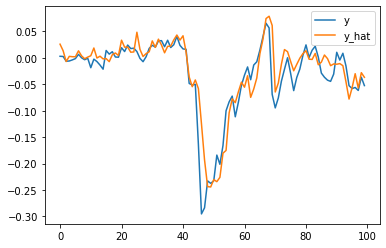

In [28]:
plot_velocity_curve(true=Y[0, :, 0], pred=Y_hat[0, :, 0])

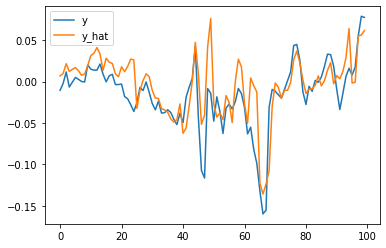

In [257]:
plot_velocity_curve(true=Y[0, :, 1], pred=Y_hat[0, :, 1])

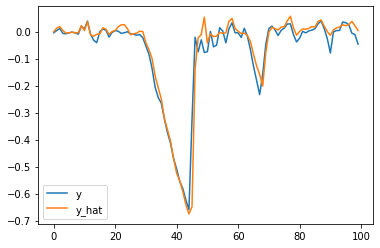

In [258]:
plot_velocity_curve(true=Y[0, :, 2], pred=Y_hat[0, :, 2])